/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

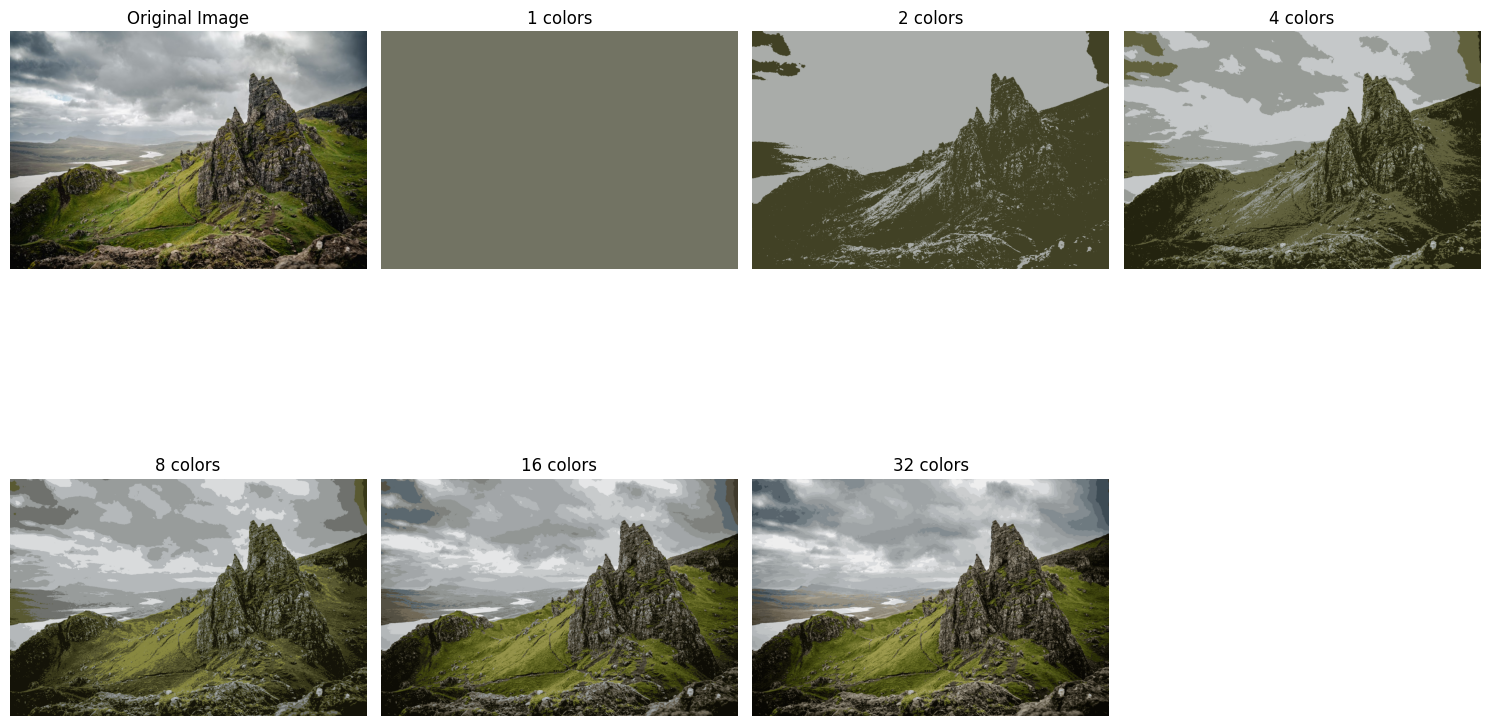

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

# Function to perform quantization
def quantize_image(image, n_colors):
    # Reshape the image to a 2D array of pixels
    pixels = np.array(image).reshape(-1, 3)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(pixels)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Replace each pixel value with the nearest cluster centroid
    quantized_pixels = centroids[labels].astype('uint8')

    # Reshape the quantized pixel data back to the original image shape
    quantized_image = quantized_pixels.reshape(image.shape)

    return quantized_image

# Load the image
image = Image.open('/content/Stones.jpg')
image = np.array(image)

# Define the number of clusters to use
n_colors_list = [1, 2, 4, 8, 16, 32]

# Plot the original and quantized images
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, n_colors in enumerate(n_colors_list, 2):
    quantized_image = quantize_image(image, n_colors)
    plt.subplot(2, 4, i)
    plt.imshow(quantized_image)
    plt.title(f'{n_colors} colors')
    plt.axis('off')

plt.tight_layout()
plt.show()
